# Import python libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
# To display the max rows & columns in dataframe
pd.set_option("Display.max_rows", None)
pd.set_option("Display.max_columns", None)

# Import Dataset using pandas

In [26]:
# To create a DataFrame using pandas library
df = pd.read_csv('Dentistry Dataset.csv')

In [27]:
# To check the 5 rows from the top of the dataFrame
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [28]:
# To check the shape of the DataFrame
print(f"Total number of rows : {df.shape[0]}")
print(f"Total number of columns : {df.shape[1]}")

Total number of rows : 1100
Total number of columns : 14


In [29]:
# To check the datatypes of each feature
df.dtypes

Sl No                                int64
Sample ID                          float64
Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

# Data Preprocessing

In [30]:
# To check the null values columns
df.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [31]:
# Create dummy variables for the Gender column
d_gender = pd.get_dummies(df['Gender'], prefix='Gender')

# Concatenate the original DataFrame with the dummy variables
numeric_only = pd.concat([df, d_gender], axis=1)

# Removing the unnecessary features
numeric_only = numeric_only.drop(columns=["Sample ID","Sl No"], axis=1)

In [139]:
numeric_only.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts,Gender_Female,Gender_Male
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241,True,False
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247,True,False
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264,True,False
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250,True,False
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246,True,False


In [141]:
from sklearn.model_selection import train_test_split

# Split independent & dependent variable i.e X and Y
X = df_numeric_only.drop(["Gender"],axis=1)    # independent feature should be DataFrame or 2-dimensional array
y = df_numeric_only["Gender"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [142]:
# Normalize the X variable
from sklearn.preprocessing import Normalizer

# dataframe
x = df_numeric_only.drop("Gender", axis=1)

# create a normalizer object
normalizer = Normalizer()

# Fit and transform the data
x_normalized = normalizer.fit_transform(x)

In [143]:
print(x_normalized)

[[0.53922772 0.56304361 0.56281893 ... 0.00541474 0.02246782 0.        ]
 [0.49563399 0.58079292 0.58101821 ... 0.00556462 0.02252882 0.        ]
 [0.53982182 0.55930235 0.55930235 ... 0.00619622 0.02347051 0.        ]
 ...
 [0.56240794 0.54531074 0.54531074 ... 0.006119   0.         0.02249632]
 [0.48766619 0.5775361  0.5775361  ... 0.00620033 0.         0.0232222 ]
 [0.52701823 0.56161812 0.56161812 ... 0.00632422 0.         0.02291384]]


# Summary Statistics of Numerical features

In [33]:
numeric_only.describe()

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


# Exploratory Data Analysis

# Correlation matrix

In [144]:
corr_matrix = numeric_only.corr(numeric_only=True)
corr_matrix

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts,Gender_Female,Gender_Male
Age,1.000000,0.071300,0.033494,0.243534,0.241017,0.162094,0.167698,0.101415,0.199058,0.112364,0.109734,-0.129936,0.129936
inter canine distance intraoral,0.071300,1.000000,0.755648,0.564793,0.566652,0.601423,0.590075,-0.382836,-0.352744,-0.343861,-0.338299,-0.340494,0.340494
intercanine distance casts,0.033494,0.755648,1.000000,0.400577,0.402120,0.435529,0.357952,-0.308260,-0.297661,-0.283392,-0.279846,-0.180692,0.180692
right canine width intraoral,0.243534,0.564793,0.400577,1.000000,0.999832,0.941932,0.937016,0.434863,0.570471,0.506583,0.510783,-0.557938,0.557938
right canine width casts,0.241017,0.566652,0.402120,0.999832,1.000000,0.943088,0.938069,0.432951,0.568764,0.506022,0.510247,-0.558057,0.558057
left canine width intraoral,0.162094,0.601423,0.435529,0.941932,0.943088,1.000000,0.994120,0.341201,0.473677,0.540797,0.545525,-0.626347,0.626347
left canine width casts,0.167698,0.590075,0.357952,0.937016,0.938069,0.994120,1.000000,0.346256,0.479567,0.546163,0.551036,-0.636199,0.636199
right canine index intra oral,0.101415,-0.382836,-0.308260,0.434863,0.432951,0.341201,0.346256,1.000000,0.876839,0.799557,0.798836,-0.203549,0.203549
right canine index casts,0.199058,-0.352744,-0.297661,0.570471,0.568764,0.473677,0.479567,0.876839,1.000000,0.922306,0.921592,-0.295163,0.295163
left canine index intraoral,0.112364,-0.343861,-0.283392,0.506583,0.506022,0.540797,0.546163,0.799557,0.922306,1.000000,0.999323,-0.379249,0.379249


# Heat map

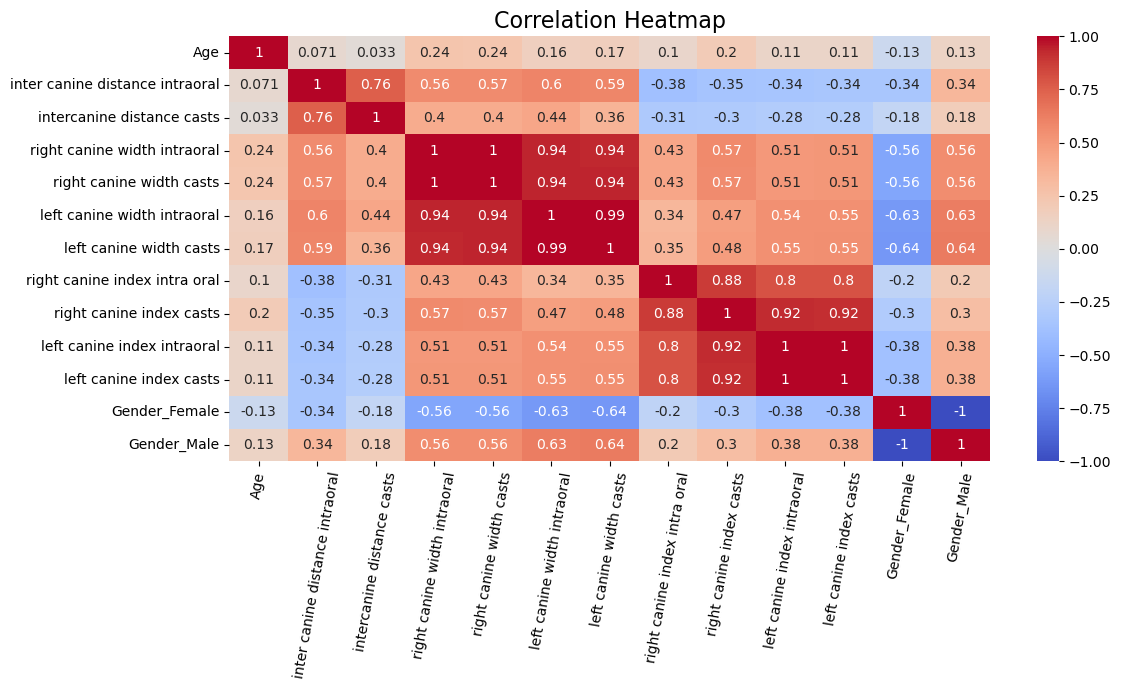

In [145]:
# To determine the figure size
plt.figure(figsize=(12,7))

# To plot a Correlation Heatmap
sns.heatmap(numeric_only.corr(numeric_only=True), annot=True, cmap='coolwarm' )
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

As you can see from this correlation heat map, that their are some features that are highly correlated with others features

# Gender

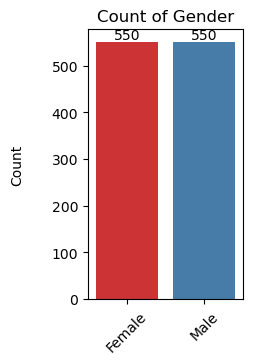

In [170]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(2,3.5))

# To create a countplot|
sns.countplot(numeric_only, x="Gender", palette='Set1')
plt.title("Count of Gender")
plt.ylabel("Count", labelpad=20, fontsize=10)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel('')

As you can see here their are equal number of males & females

# Histogram plot for numerical features

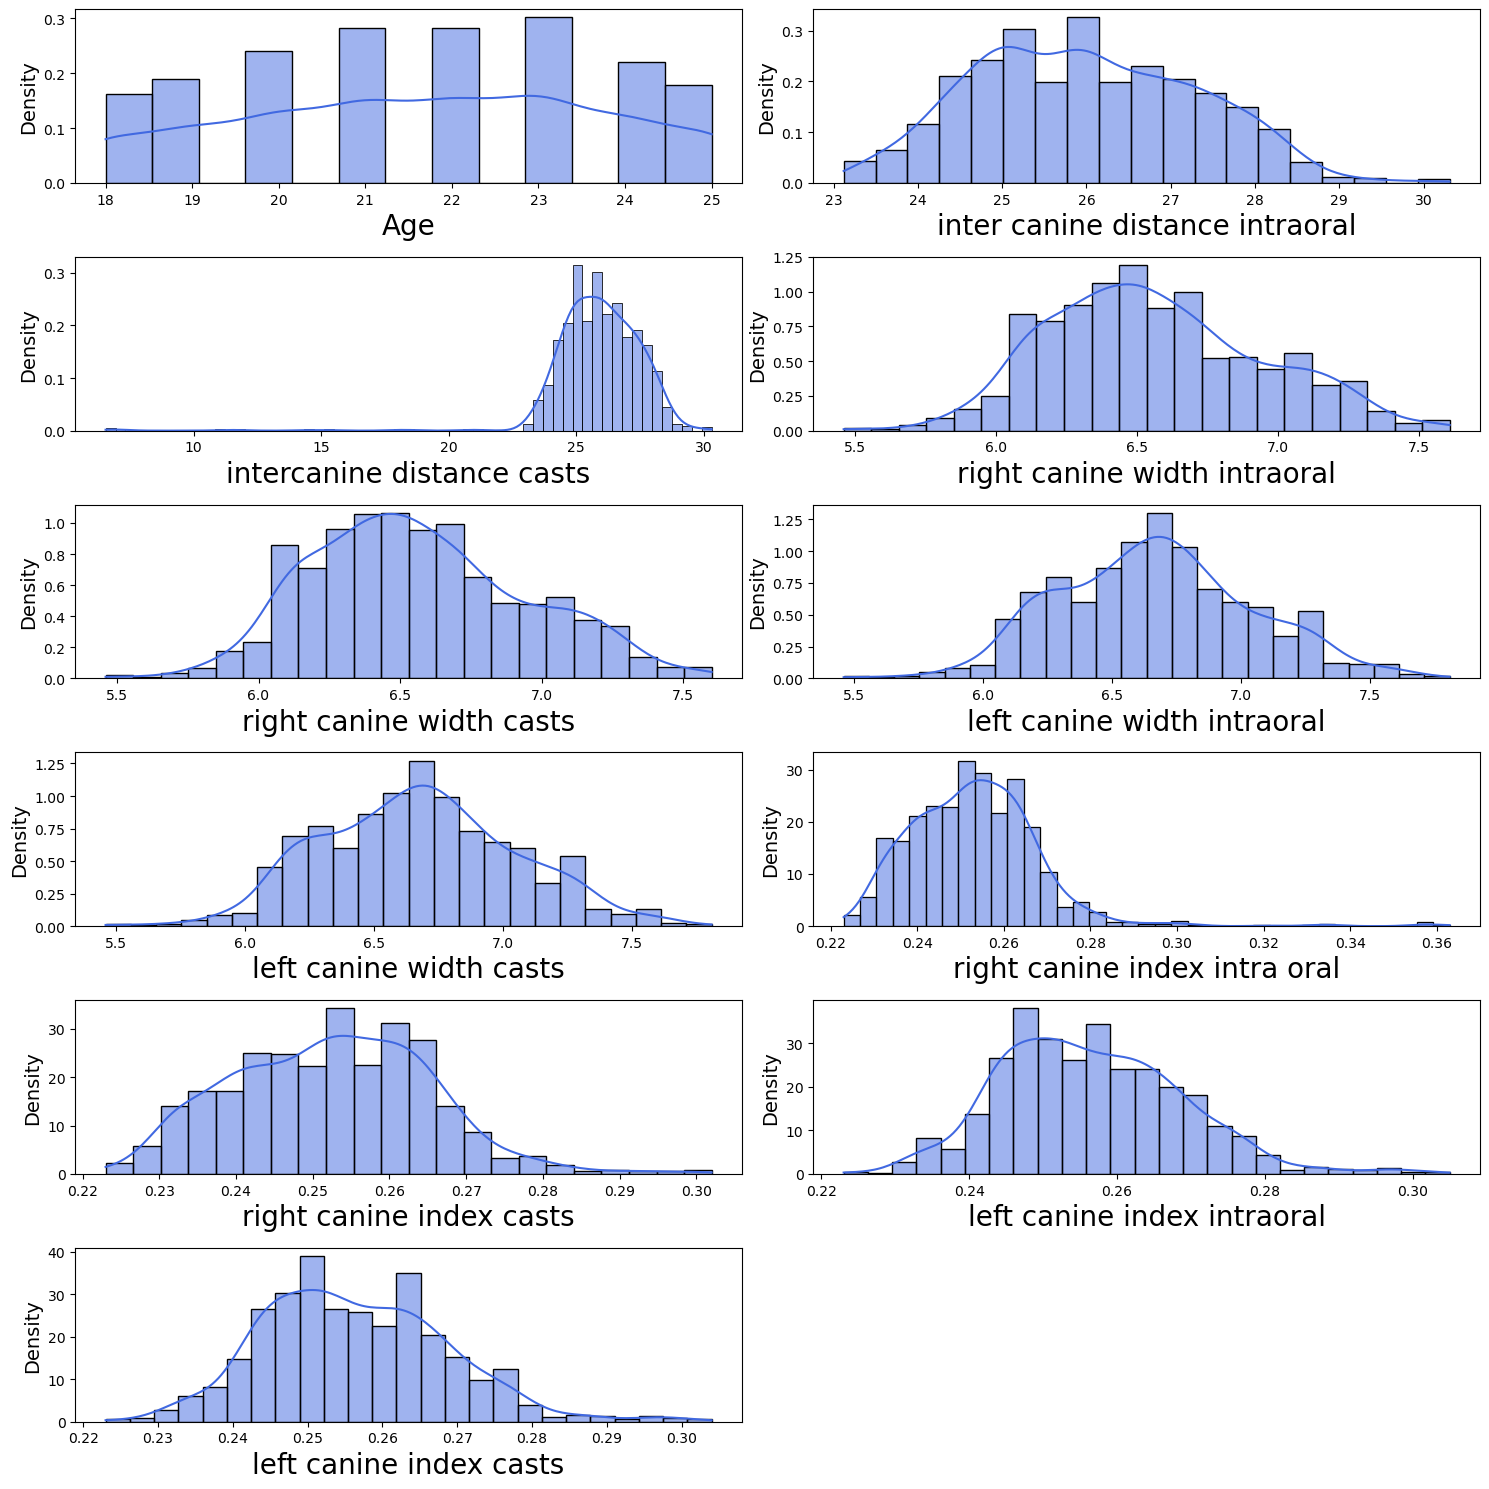

In [148]:
numerical_cols = numeric_only.select_dtypes(include=["float64","int64"])

# To determine the figure size
plt.figure(figsize=(15,15))

# To create a histogram plot for all the numerical features
for count,i in enumerate(numerical_cols):
    plt.subplot(6,2,count+1)
    sns.histplot(numerical_cols, x=i, kde=True, stat='density', color='royalblue')
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Density', fontsize=14)
plt.tight_layout()
plt.show()

From this histogram plot we can see the data distribution and skewness for each features

<Axes: xlabel='right canine width intraoral', ylabel='right canine index casts'>

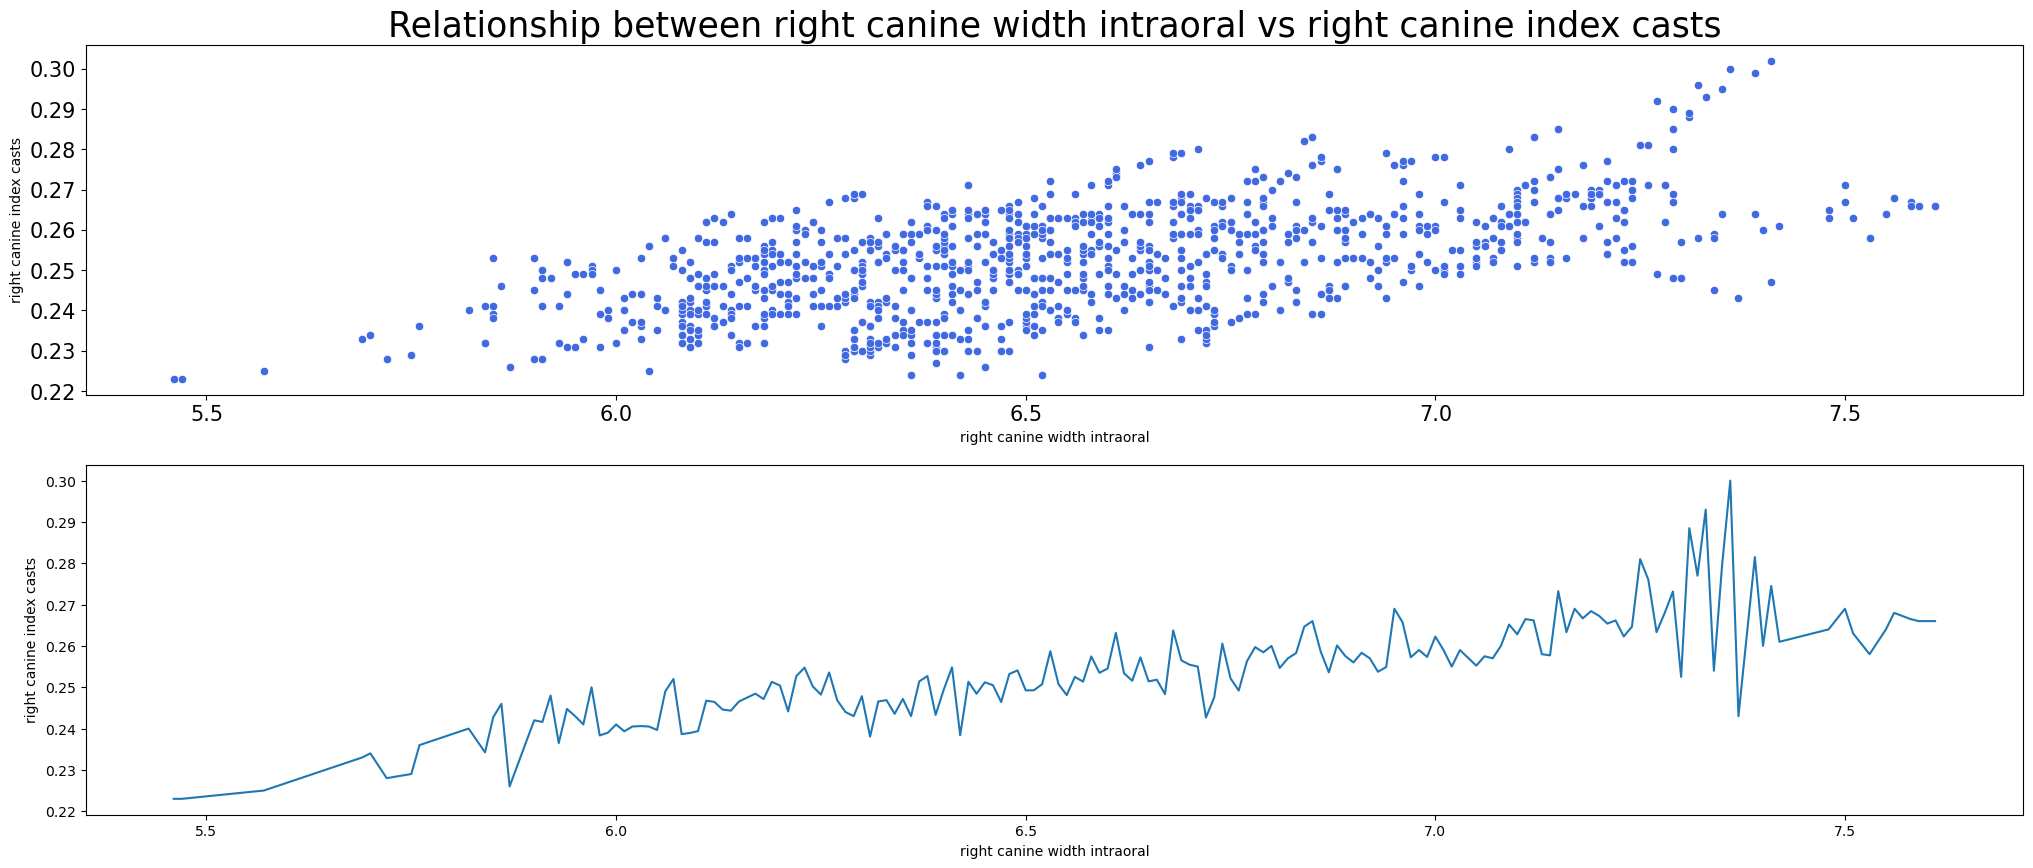

In [149]:
plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
sns.scatterplot(numeric_only, x="right canine width intraoral", y="right canine index casts", color='royalblue')
plt.title("Relationship between right canine width intraoral vs right canine index casts", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(2,1,2)
sns.lineplot(numeric_only, x='right canine width intraoral', y='right canine index casts', palette='royalblue',errorbar=None)


The figure shows a positive correlation between the width of the right canine tooth measured intraorally and the index of the right canine tooth measured on casts. This means that as the width of the right canine tooth measured intraorally increases, the index of the right canine tooth measured on casts also tends to increase. This correlation is not perfect, but it is clear.

<Axes: xlabel='right canine width intraoral', ylabel='left canine width intraoral'>

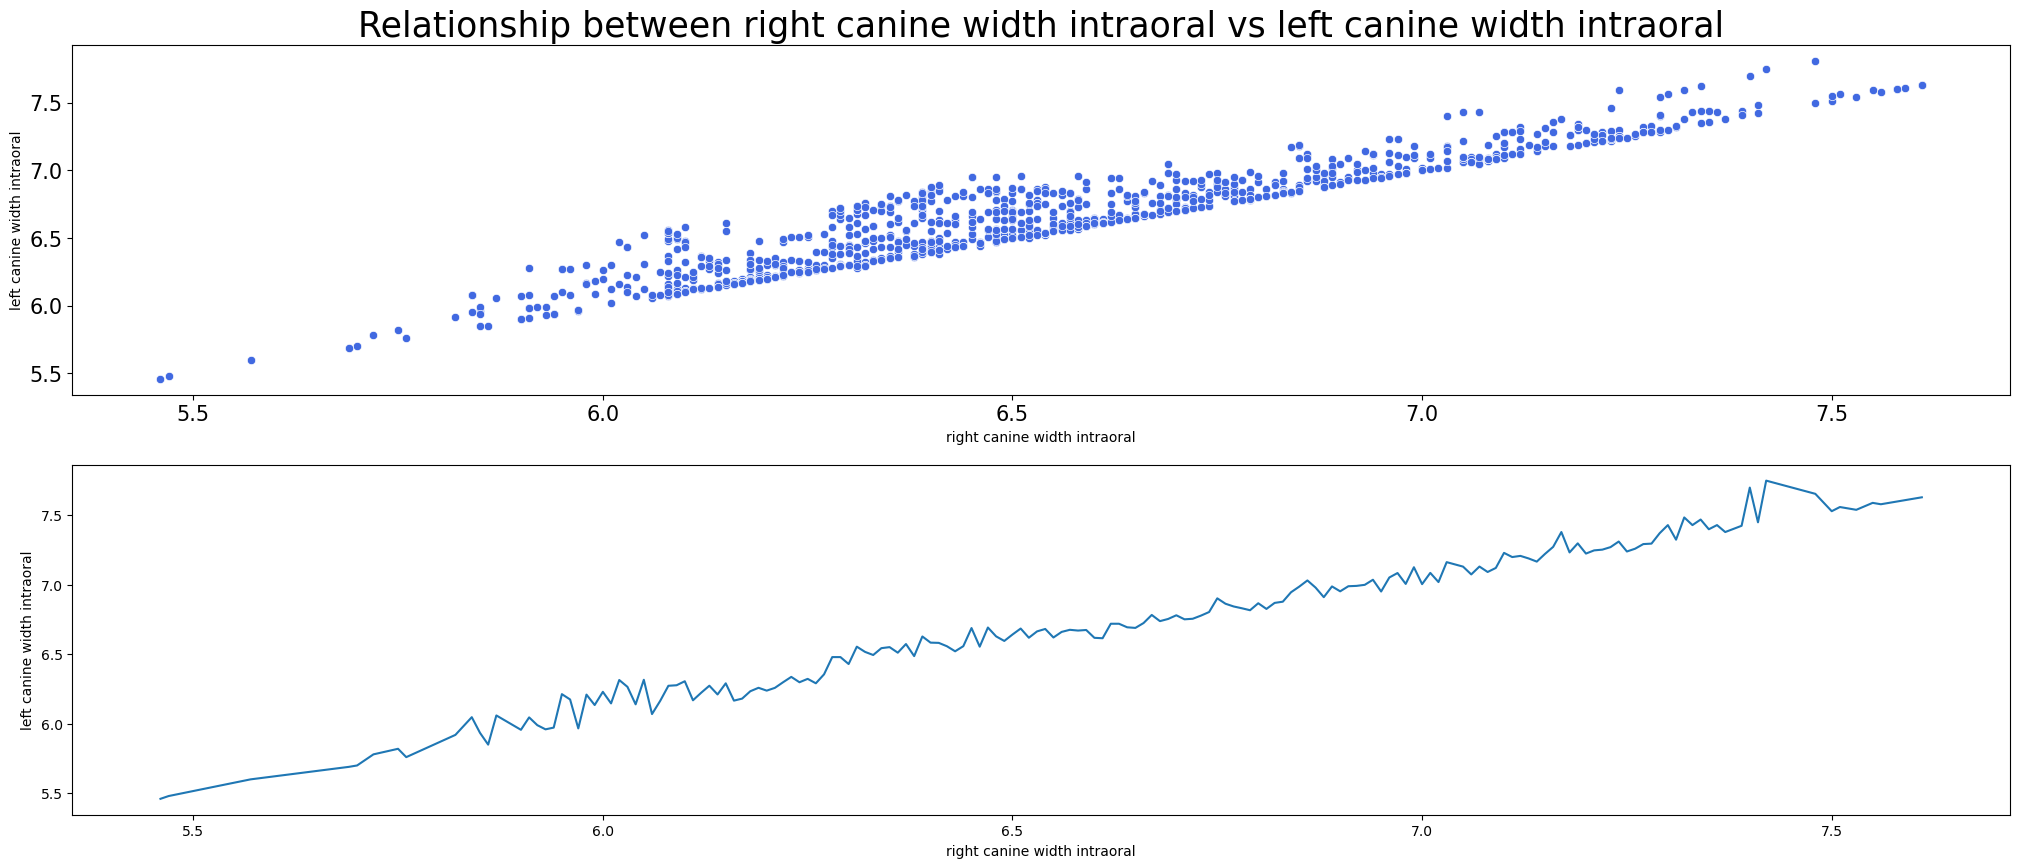

In [150]:
plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
sns.scatterplot(numeric_only, x="right canine width intraoral", y="left canine width intraoral", color='royalblue')
plt.title("Relationship between right canine width intraoral vs left canine width intraoral", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2,1,2)
sns.lineplot(numeric_only, x='right canine width intraoral', y='left canine width intraoral', palette='royalblue',errorbar=None)

This above figure shows a positive correlation between each other, if one feature increases than the other one also increases.

<Axes: xlabel='right canine width intraoral', ylabel='left canine width casts'>

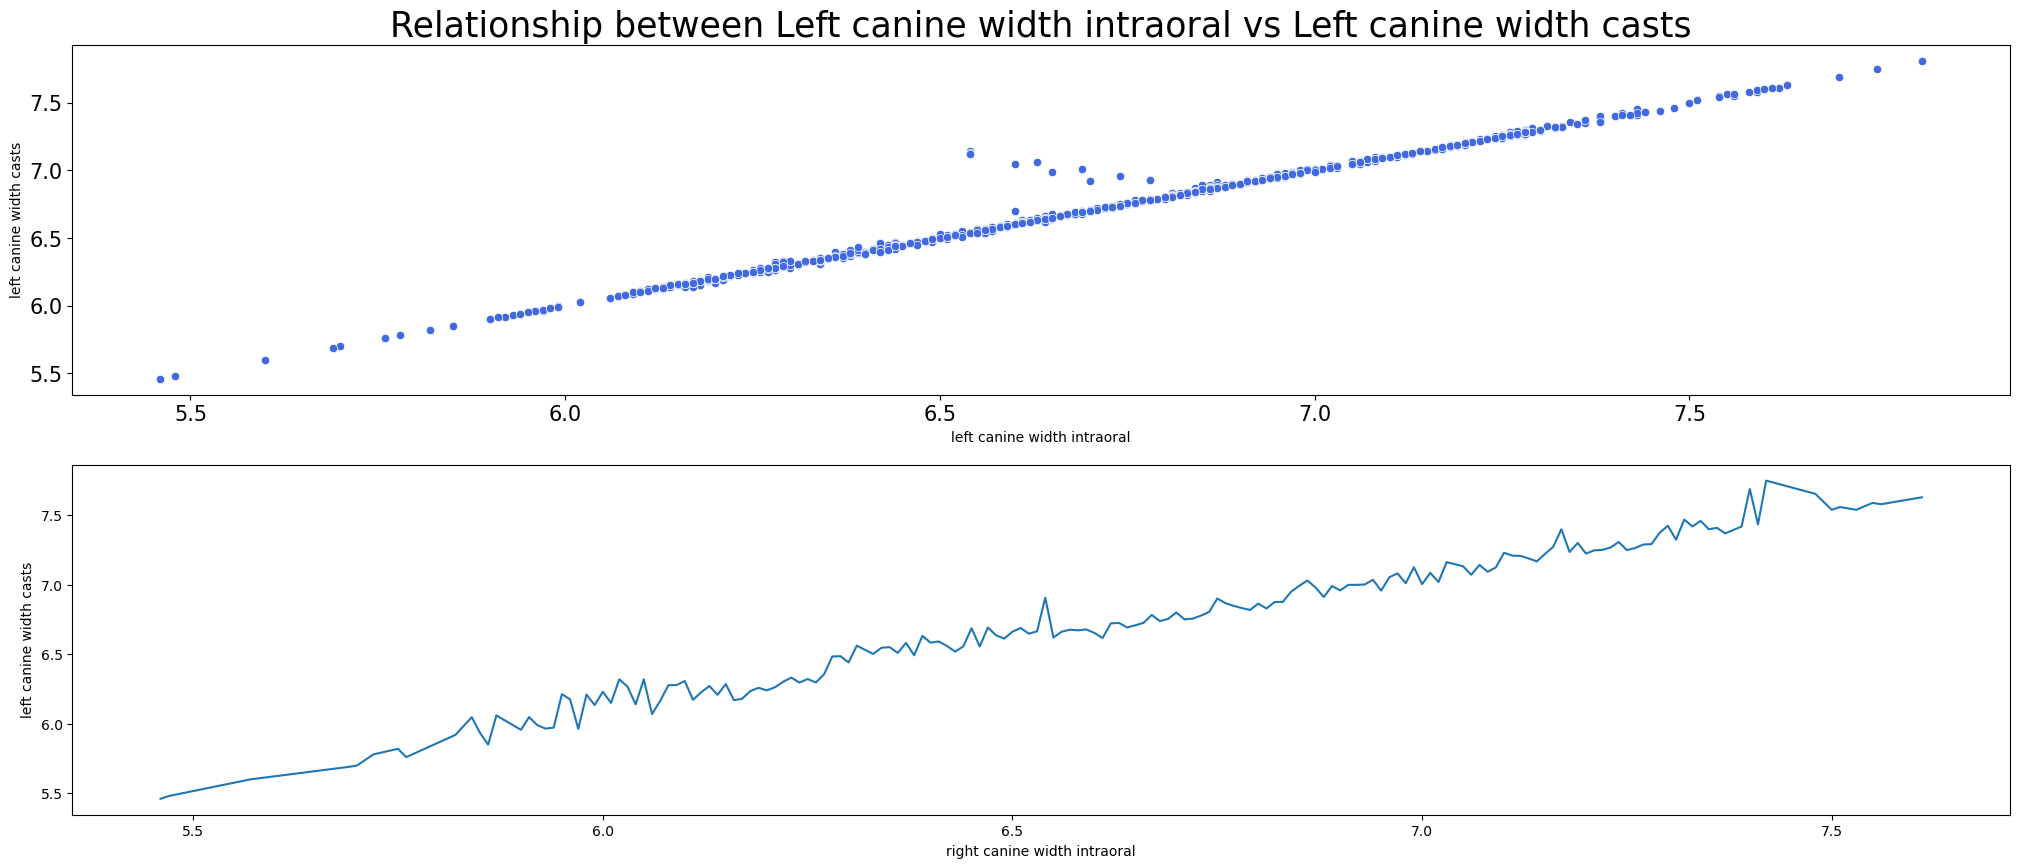

In [151]:
plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
sns.scatterplot(numeric_only, x="left canine width intraoral", y="left canine width casts", color='royalblue')
plt.title("Relationship between Left canine width intraoral vs Left canine width casts",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2,1,2)
sns.lineplot(numeric_only, x='right canine width intraoral', y='left canine width casts', palette='royalblue',errorbar=None)

It shows a positive correlation between left canine width casts and left canine width intraoral, it is basically directly proportional to each other, as one increases other one also increases.

<Axes: xlabel='right canine index casts', ylabel='left canine width casts'>

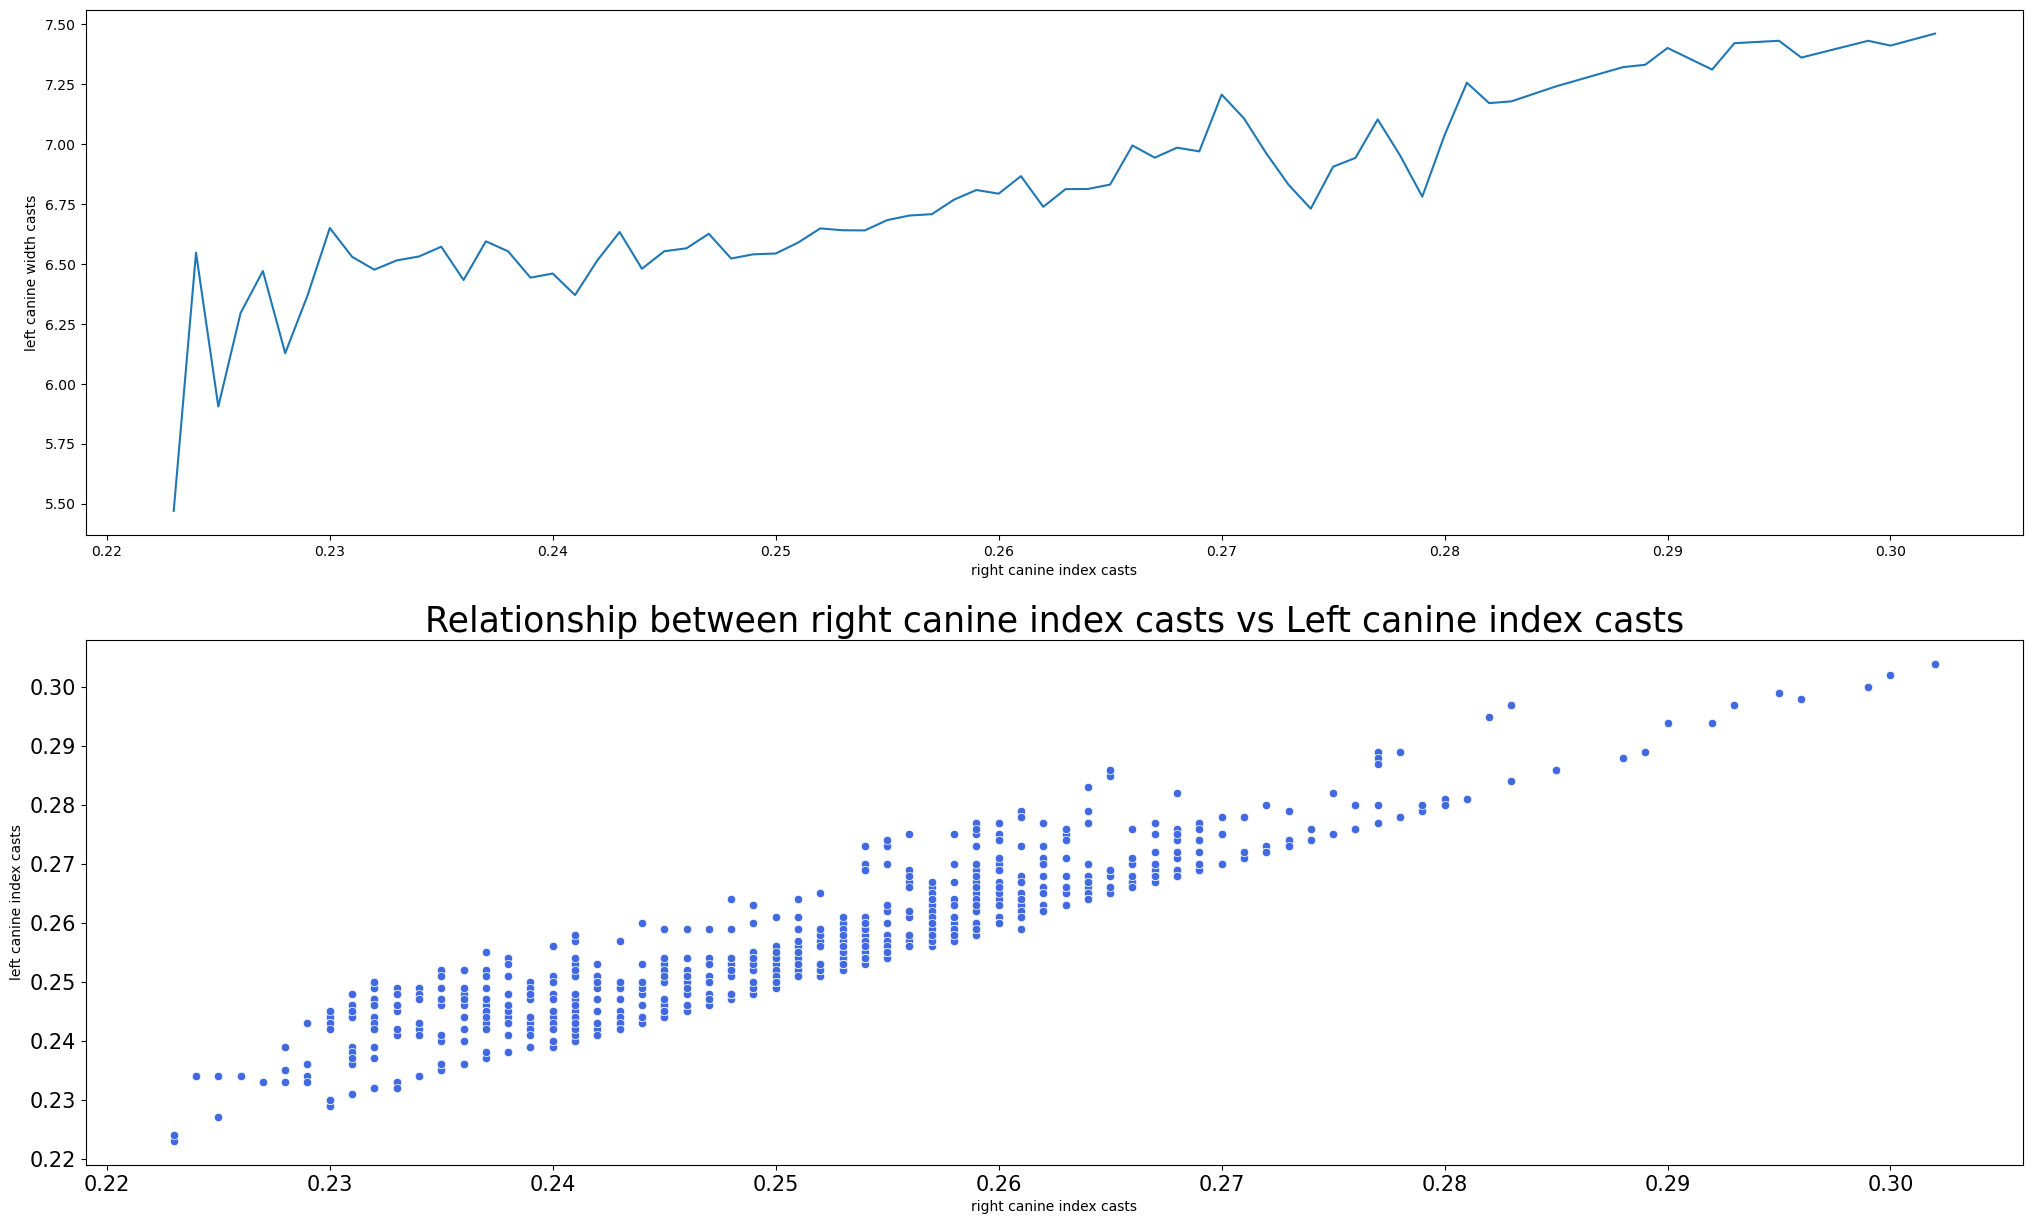

In [153]:
plt.figure(figsize=(25,15))
plt.subplot(2,1,2)
sns.scatterplot(numeric_only, x="right canine index casts", y="left canine index casts", color='royalblue')
plt.title("Relationship between right canine index casts vs Left canine index casts",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(2,1,1)
sns.lineplot(numeric_only, x='right canine index casts', y='left canine width casts', palette='royalblue',errorbar=None)

The scatter plot shows a positive correlation between the right and left canine index casts. This means that as the right canine index cast increases, the left canine index cast also tends to increase. The strong positive correlation suggests that the measurements of the right and left canine index casts are highly related.

Text(0, 0.5, 'inter canine distance intraoral\t')

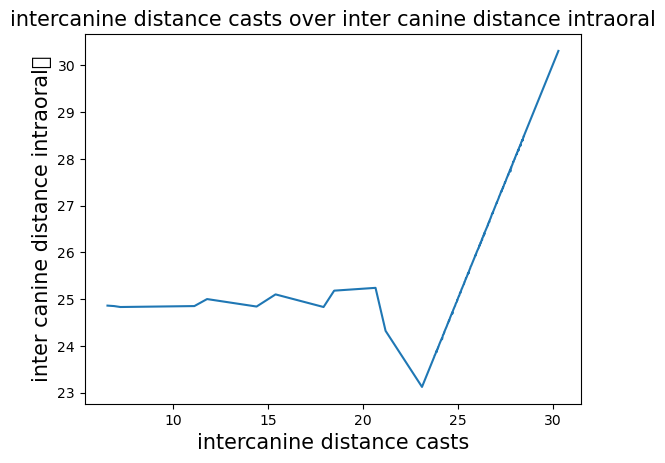

In [154]:
sns.lineplot(numeric_only, x='intercanine distance casts', y='inter canine distance intraoral', palette='royalblue',errorbar=None)
plt.title('intercanine distance casts over inter canine distance intraoral', fontsize=15)
plt.xlabel('intercanine distance casts',fontsize=15)
plt.ylabel('inter canine distance intraoral	', fontsize=15)

# Model Building

# Train Test split

In [155]:
from sklearn.model_selection import train_test_split

# Split independent & dependent variable i.e X and Y
X = numeric_only.drop(["Gender"],axis=1)    # independent feature should be DataFrame or 2-dimensional array
y = numeric_only["Gender"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# create a logistic regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = log_reg.predict(X_test)

# To check the train and test score
train_score = log_reg.score(X_train,y_train)
test_score = log_reg.score(X_test,y_test)

# Evaluate the model
print("Train score : {}".format(train_score))
print("Test score : {}".format(test_score))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Train score : 1.0
Test score : 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       107
        Male       1.00      1.00      1.00       113

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

Confusion Matrix:
[[107   0]
 [  0 113]]


<Axes: ylabel='Count'>

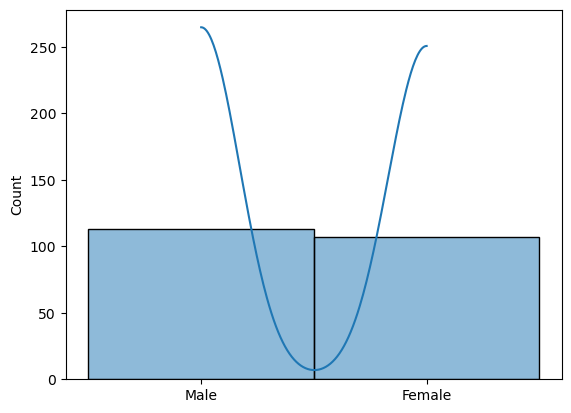

In [157]:
sns.histplot(y_pred, kde=True)

# Decision Tree classifier

In [158]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dec_tree = DecisionTreeClassifier()

# Train the model on the training data
dec_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dec_tree.predict(X_test)

# To check the train and test score
train_score = dec_tree.score(X_train,y_train)
test_score = dec_tree.score(X_test,y_test)


# Evaluate the model
print("Train score : {}".format(train_score))
print("Test score : {}".format(test_score))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Train score : 1.0
Test score : 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       107
        Male       1.00      1.00      1.00       113

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

Confusion Matrix:
[[107   0]
 [  0 113]]


In [159]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

# Random Forest classifier

In [160]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# To check the train and test score
train_score = rfc.score(X_train,y_train)
test_score = rfc.score(X_test,y_test)

# Evaluate the model
print("Train score : {}".format(train_score))
print("Test score : {}".format(test_score))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Train score : 1.0
Test score : 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       107
        Male       1.00      1.00      1.00       113

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

Confusion Matrix:
[[107   0]
 [  0 113]]


In [161]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# XGBOOST Classifier

In [162]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create a DMatrix object for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)

# Define the XGBoost classifier parameters
params = {
    'objective': 'multi:softprob',
    'num_class': 3,  # number of classes
    'max_depth': 6,
    'learning_rate': 0.1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'seed': 42
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=1000)

# Evaluate the model on the training data
train_eval = bst.eval(dtrain)
print("Train eval:", train_eval)

# Evaluate the model on the testing data
test_eval = bst.eval(dtest)
print("Test eval:", test_eval)

# Make predictions on the testing data
y_pred_prob = bst.predict(dtest)
y_pred = y_pred_prob.argmax(axis=1)

# Convert y_pred back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred_labels))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_labels))


ModuleNotFoundError: No module named 'xgboost'

<Axes: ylabel='Count'>

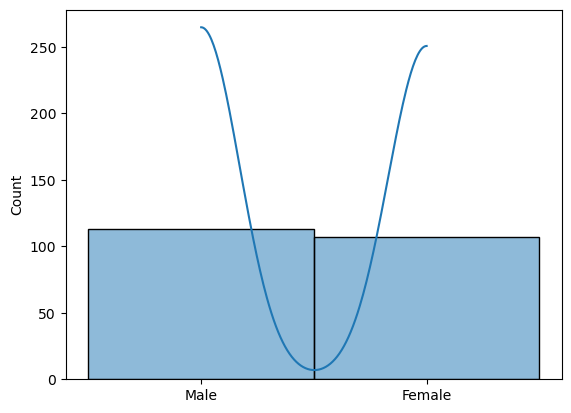

In [163]:
sns.histplot(y_pred, kde=True)

# Conclusion :- All the models are providing decent score with high accuracy, as result our training data is perfect fit with all the models(logisticRegression, Decision Tree classifier, Random forest classifier, XGboost classifier)